# Calculating a radius at which the Rossby number = 1 for varying frequencies

### $ R_o = {{u \cdot \nabla u} \over { 2 \Omega \times u}}$
simplifying to $ R_o ={u \over {2 \Omega L }}$
and $ u \propto \bigl( {{F(r)} \over {\rho(r)}} \bigr) ^{1/3} $ where L is relavent length scale and 
$ F = {{Luminosity} \over {4 \pi r^2}} $
rearranging as $\Omega = \bigl( {{{luminosity}\over{4\pi r^2}}{1\over\rho(r)}} \bigr)^{1\over3} {1\over{2R_{o}L}}$\\

$\Omega = \bigl( {{F}{1\over\rho(r)}} \bigr)^{1\over3} {1\over{2R_{o}L}}$


Will be calculating the frequency at which the shear layer will occur at specific depths, this is easier than calculating the depth fro certain frequencies as the density id depth specific. And would thus need to know the depth to know what density to  use to calculate the depth.

In [2]:
import numpy as np
import scipy.constants as sc
import astropy.constants as ac
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Calculating the brackert
$\bigl( {{F}{1\over\rho(r)}} \bigr)^{1\over3}$

In [4]:
def bracket(F, rho):
    """Calulating the bracketed section as shown above
    F flux
    rho density
    produces the bracket to power if 1/3"""
    numerator = F
    denominator = rho
    brack = (F/rho) **(1/3)
    return brack

### Importing data
file contains radius, speed of sound, density, pressure, gamma, temperature

In [6]:
infilename = 'modelS_cptrho.l5bi.d.15c.txt' #limited set of vars, easy to parse
data = np.genfromtxt(infilename, unpack=True)
# if using simple-format file:
radius = data[0]
cs = data[1]
rho = data[2]
pressure = data[3]
gamma_1 = data[4]
temperature = data[5]

In [7]:
len(rho)

2482

In [8]:
leng = 6.96e8 *0.3
Luminosity = 3.83e26 
Mass = 1.99e30
print(len(rho))
rad = radius * 6.96e8
density = rho * 1000     #multiply by 1000 to convert to SI
#print(int(np.floor(len(rad)*0.8)))
flux = Luminosity / ( 4* np.pi * np.power((0.80*rad),2))
rossby = 1.0

2482


C:\Users\bensh\AppData\Local\Temp\ipykernel_11520\1164926056.py:8: RuntimeWarning: divide by zero encountered in divide
  flux = Luminosity / ( 4* np.pi * np.power((0.80*rad),2))


ignore(##### Flipping the flux as radius and density run from surface to core. Brings it inline with these.)

In [10]:
#flux = np.flip(flux)

##### going to remove the inner 20% of the radius data points so that the flux begins at the edge of fusion. will also have to remove the outer 20% of flux data.

Done by creating new arrays and assinging the value to it one by one. Since the arrays run surface to "core" you can assign them one by one until about 80% of the way through then stop. thus avoiding the "core"

In [12]:
#print(len(flux))
#print(flux)

outer_rad = []
outer_flux = []
outer_density = []

for i in range((int(np.floor(len(rad)*0.8)))):
   
    outer_rad.append(radius[i])
    outer_flux.append(flux[i])
    outer_density.append(density[i])
    #print(i)


outer_rad = np.array(outer_rad)
outer_flux = np.array(outer_flux)
outer_density = np.array(outer_density)

#print(len(outer_flux))
#print(outer_flux)

#### The three followuing graphs are to check the radius, density and flux all in the correct direction.
If the radius starts high and decreases, then the density should increase  and the flux should increase. Since the higher numbered data point are closer to the core, thus higher density, higher flux (due to smaler area) and lower radius

Text(0, 0.5, 'Radius')

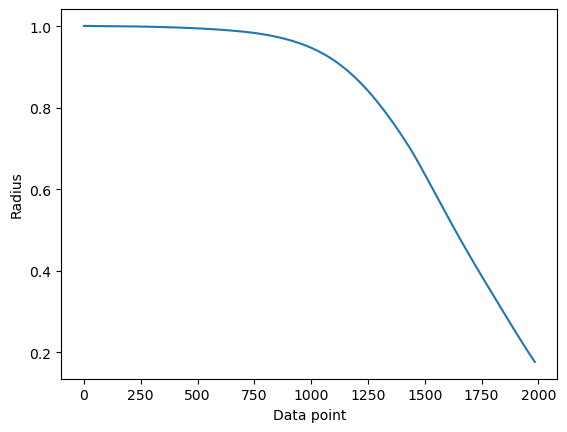

In [14]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(outer_rad)
ax2.set_xlabel("Data point")
ax2.set_ylabel("Radius")

Text(0, 0.5, 'density')

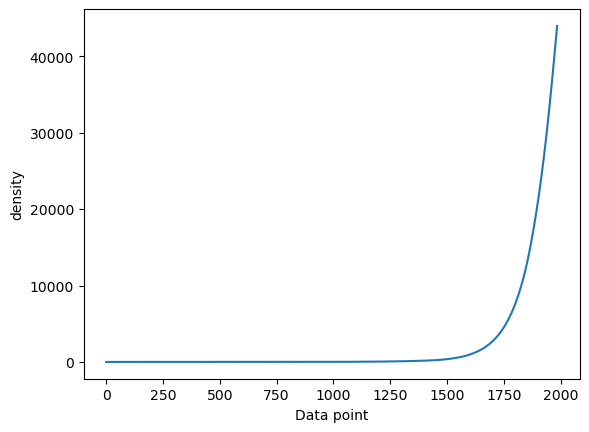

In [15]:
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.plot(outer_density)
ax3.set_xlabel("Data point")
ax3.set_ylabel("density")

Text(0, 0.5, 'flux')

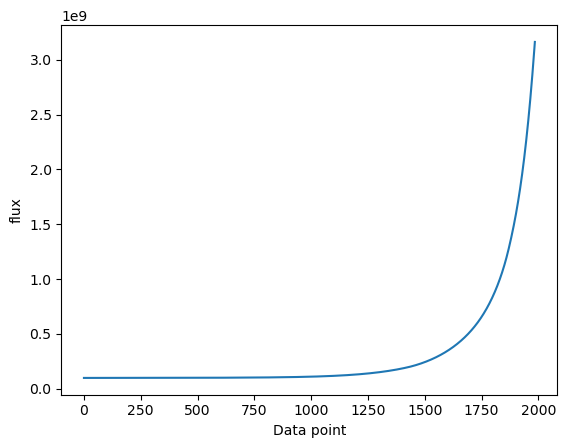

In [16]:
fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.plot(outer_flux)
ax4.set_xlabel("Data point")
ax4.set_ylabel("flux")

#### Calcualting frequencey where nssl is at certain depths for a rossby number = 1
$\Omega = \bigl( {{F}{1\over\rho(r)}} \bigr)^{1\over3} {1\over{2R_{o}L}}$

In [18]:
print("outer_flux",type(outer_flux))
print("outer_density",type(outer_density))
print("rossby",type(rossby))
print("leng",type(leng))

outer_flux <class 'numpy.ndarray'>
outer_density <class 'numpy.ndarray'>
rossby <class 'float'>
leng <class 'float'>


In [19]:
Omega = bracket(outer_flux, outer_density) * ( 1 / ( 2 * rossby *  leng))

converting omega to nHz

In [21]:
Omega = Omega / (1e-9)

Values for a vericlal line at r = 0.95R_sun

In [23]:
x = np.ones(10) * 0.95
y = np.linspace(0,1e6,10)

Text(0.5, 0.98, 'rotation rate required for each radius to have a rossby number of 1')

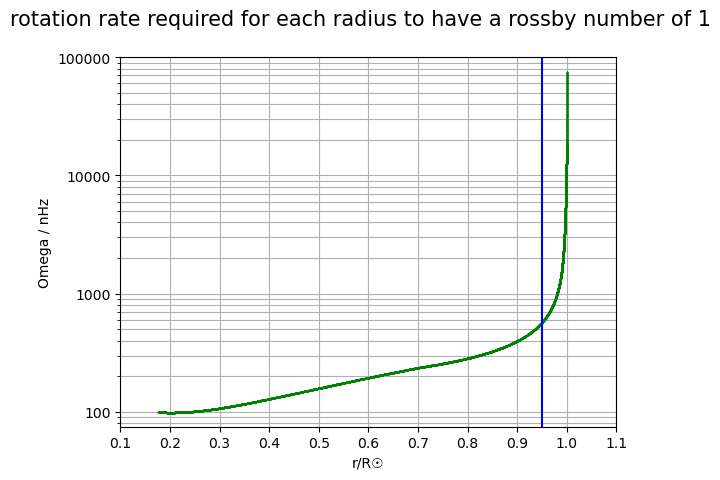

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(outer_rad, Omega, linestyle = " ", marker = "x", color = "green", markersize = 1)
ax.plot(x, y, linestyle = "solid", marker = " ", color = "blue")
ax.set_xlabel("r/R☉")
ax.set_ylabel("Omega / nHz")
ax.set_xticks(np.arange(0.1,1.2,0.1))
#ax.set_yticks(np.arange(1e-7, 1e-4, 1e-7))
ax.set_ylim(75,1e5)

ax.set_yscale('log')
#ax.legend()
#ax.grid()
ax.grid(True, which="both", ls="-")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

fig.suptitle("rotation rate required for each radius to have a rossby number of 1", fontsize = "15")